# Breast Cancer - Comparison of GMM, KNN and AE results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.arff import loadarff 
from sklearn import preprocessing
sns.set()

In [2]:
SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 15

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
min_max_scaler = preprocessing.MinMaxScaler()

knn_results = pd.read_csv("results/knn_breast_cancer_scored.csv", index_col=0)
knn_distances = pd.read_csv("results/knn_breast_cancer_distances.csv", index_col=0)
knn_distances = knn_distances / np.max(knn_distances.values)

gm_results = pd.read_csv("results/gmm_breast_cancer_scored.csv", index_col=0)
gm_distances = pd.read_csv("results/gmm_breast_cancer_distances.csv", index_col=0)
gm_distances = gm_distances / np.max(gm_distances.values)

ae_results = pd.read_csv("results/ae_breast_cancer_scored.csv", index_col=0)
ae_distances = pd.read_csv("results/ae_breast_cancer_distances.csv", index_col=0)
ae_distances = ae_distances / np.max(ae_distances.values)

data = loadarff('data/WBC_v01.arff')

df = pd.DataFrame(data[0]).drop(["id"], axis=1)
features = ["radius", "texture", "perimeter", "area" ,"smoothness", "compactness", "concavity", "concave points", "symmetry"]
df.columns = np.append(features, "label")
df.head(5)

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,label
0,8.0,6.0,4.0,3.0,5.0,9.0,3.0,1.0,1.0,"b""'yes'"""
1,8.0,8.0,9.0,6.0,6.0,3.0,10.0,10.0,1.0,"b""'yes'"""
2,5.0,10.0,10.0,10.0,10.0,2.0,10.0,10.0,10.0,"b""'yes'"""
3,6.0,10.0,7.0,7.0,6.0,4.0,8.0,10.0,2.0,"b""'yes'"""
4,10.0,5.0,8.0,10.0,3.0,10.0,5.0,1.0,3.0,"b""'yes'"""


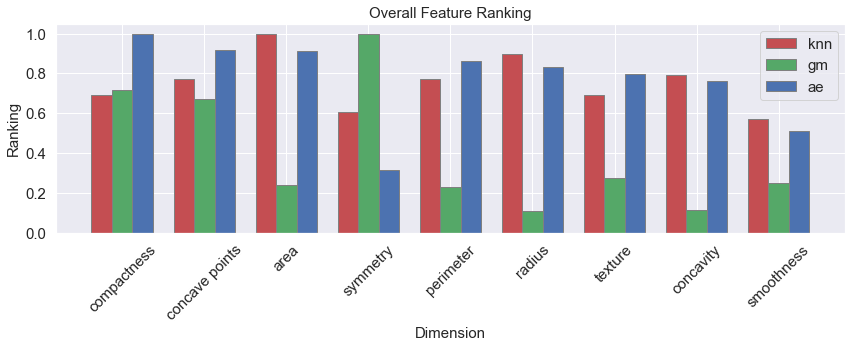

In [4]:
# plot the summed up feature ranking for all 50 outliers
barWidth = 0.25
fig, ax = plt.subplots(1, 1, figsize=(12,5))

# set height of bar
knn = knn_distances.sum().values
knn = knn / knn.max()
gm = gm_distances.sum().values
gm = gm / gm.max()
ae = ae_distances.sum().values
ae = ae / ae.max()

sort_indx = np.argsort((ae + knn + gm) * -1)

# Set position of bar on X axis
br1 = np.arange(len(knn))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
ax.bar(br1, knn[sort_indx], color ='r', width = barWidth,
        edgecolor ='grey', label ='knn')
ax.bar(br2, gm[sort_indx], color ='g', width = barWidth,
        edgecolor ='grey', label ='gm')
ax.bar(br3, ae[sort_indx], color ='b', width = barWidth,
        edgecolor ='grey', label ='ae')

# Adding Xticks
ax.set_xlabel('Dimension')
ax.set_ylabel('Ranking')
#ax.set_ylim([0, 1.03])
ax.set_xticks([r + barWidth for r in range(len(knn))])
ax.set_xticklabels(knn_distances.columns[sort_indx], rotation=45)
ax.legend()
ax.set_title("Overall Feature Ranking")
#ax.set_yticklabels([])

fig.tight_layout()
#plt.savefig("images/wine_quality_data_ranking.eps", bbox_inches="tight")
plt.show()
sorted_columns = knn_distances.columns[sort_indx]

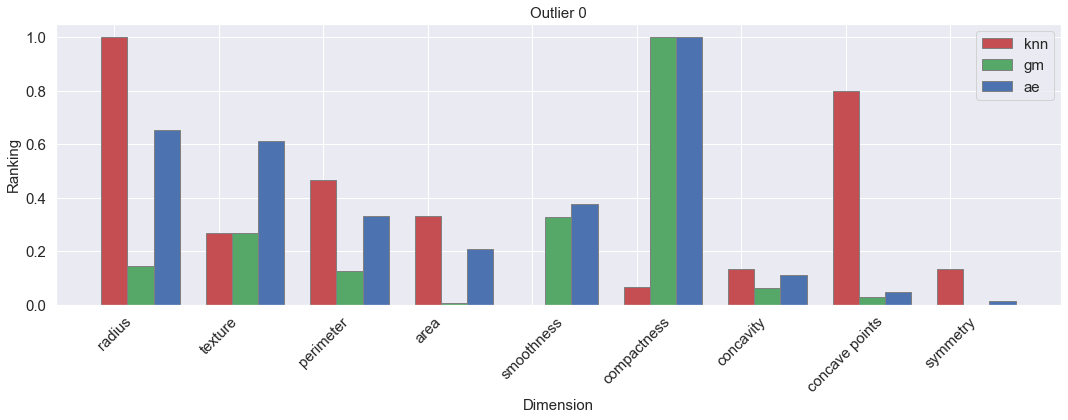

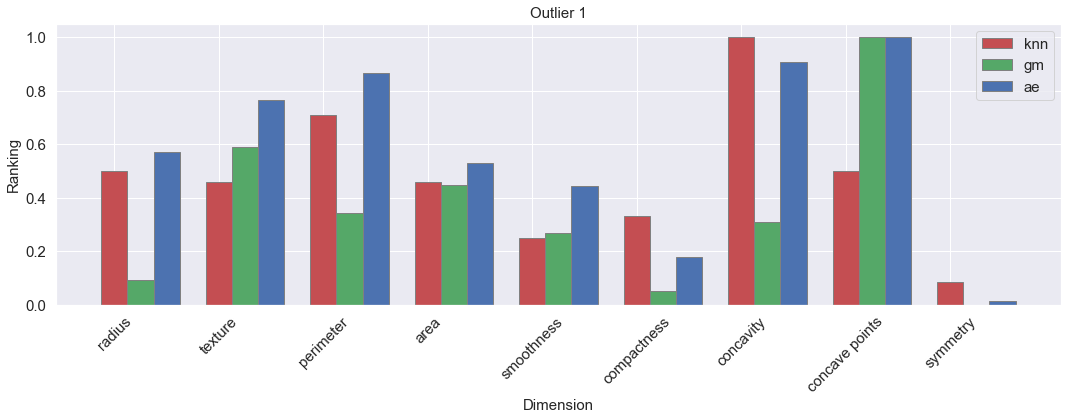

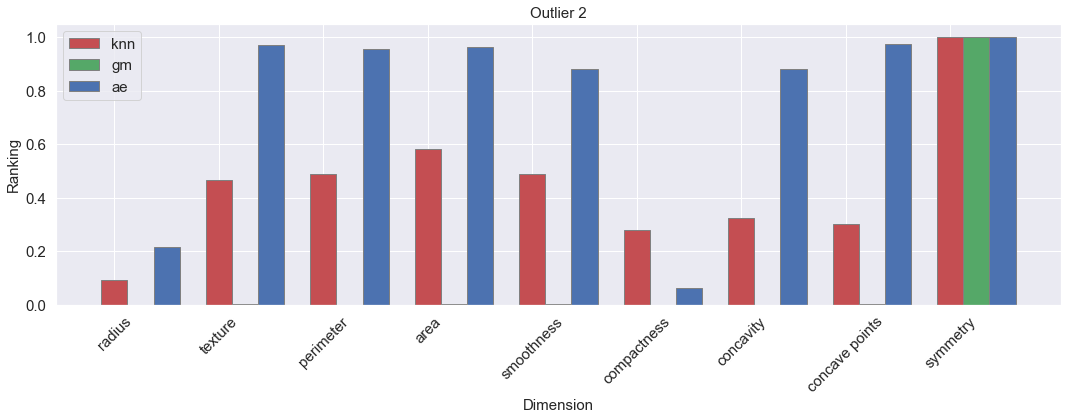

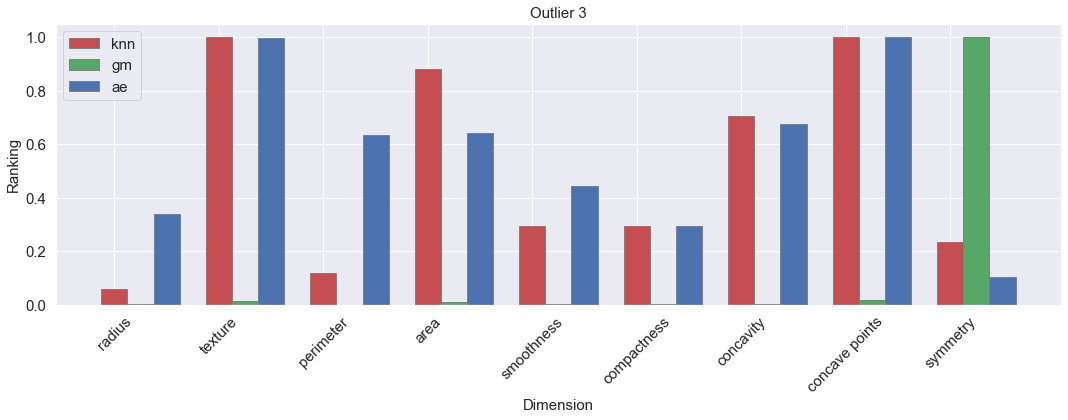

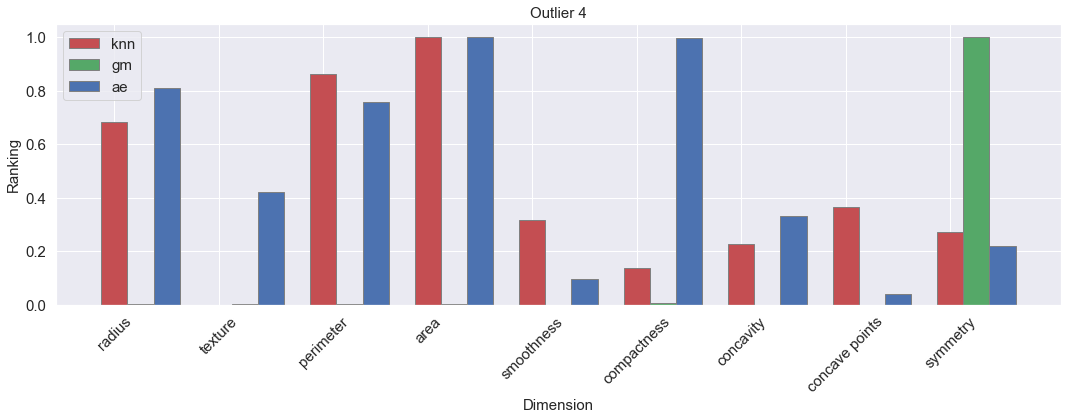

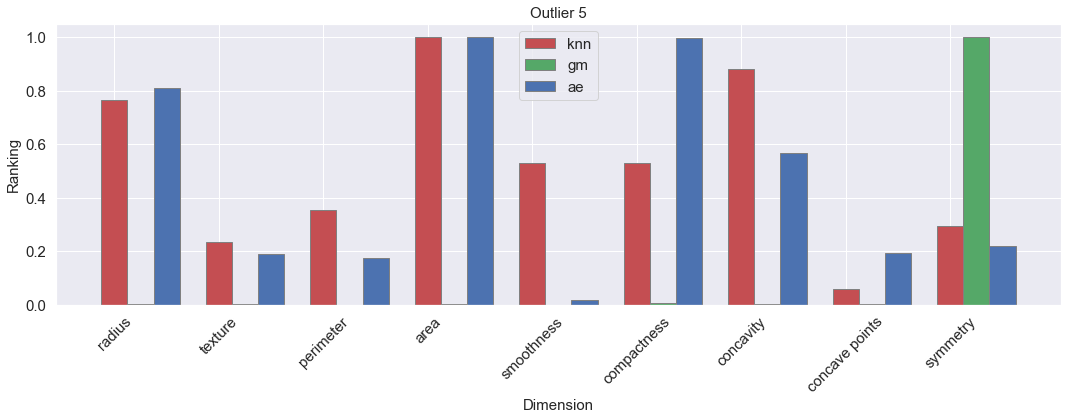

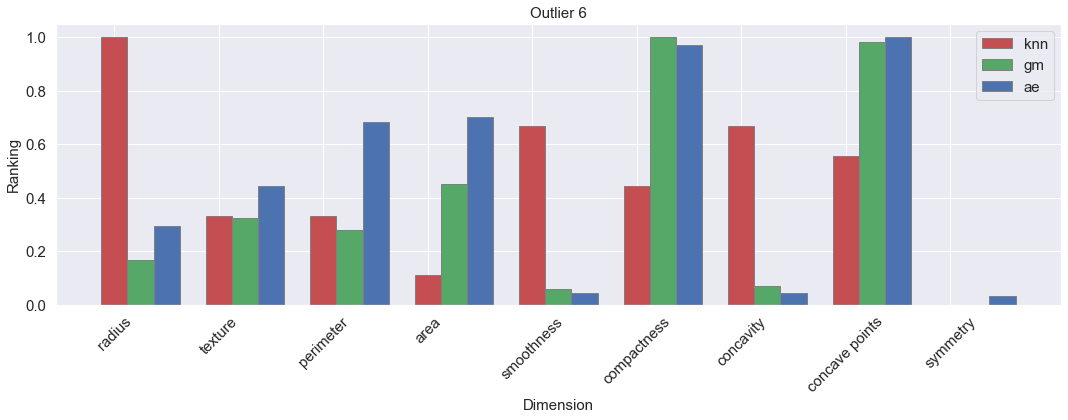

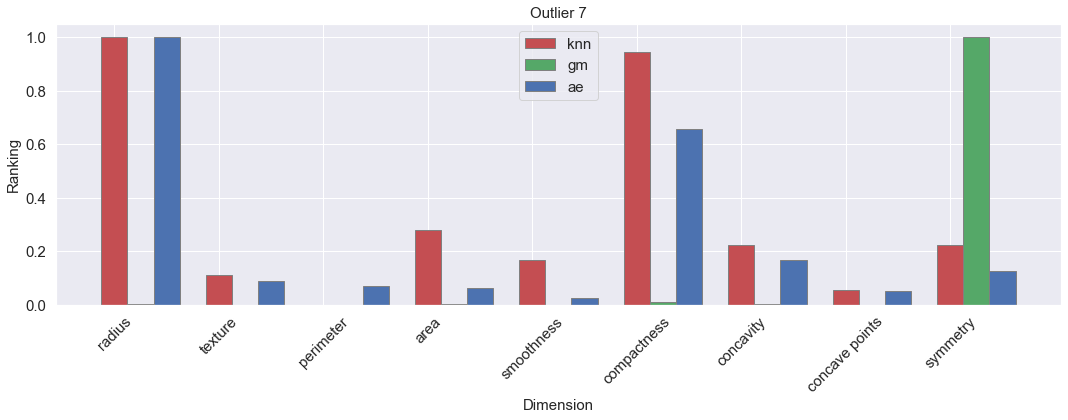

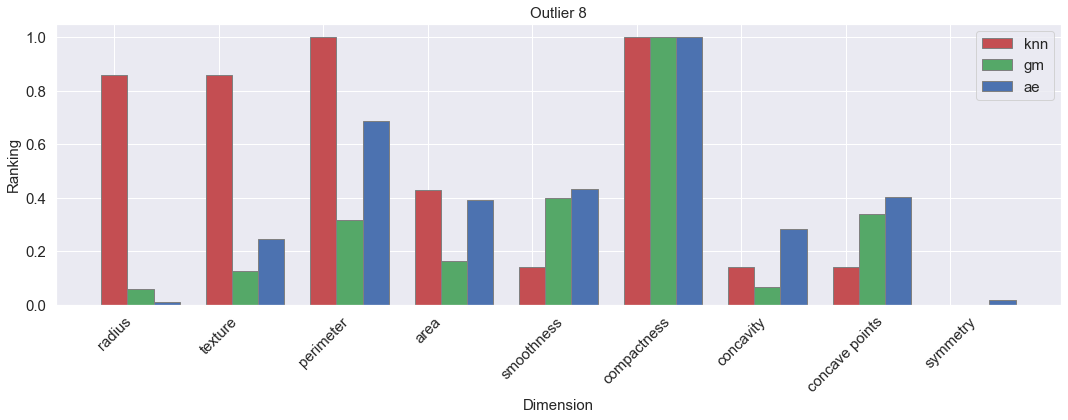

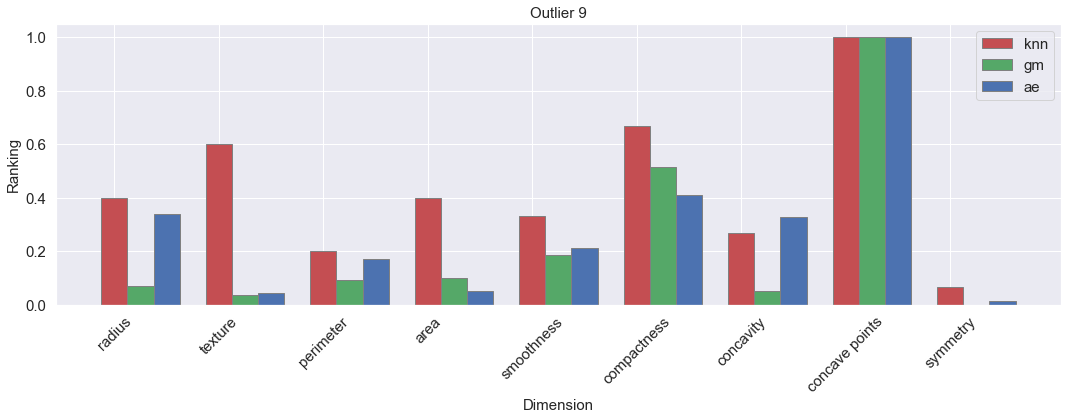

In [5]:
# plot feature ranking for individual outliers
for i in knn_distances.index.values[:20]:
    barWidth = 0.25
    fig, ax = plt.subplots(1, 1, figsize=(15,6))

    outlier_idx = i

    # set height of bar
    knn = knn_distances.loc[outlier_idx].values
    knn = knn / np.max(knn)
    gm = gm_distances.loc[outlier_idx].values
    gm = gm / np.max(gm)
    ae = ae_distances.loc[outlier_idx].values
    ae = ae / np.max(ae)

    # Set position of bar on X axis
    br1 = np.arange(len(knn))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]

    # Make the plot
    ax.bar(br1, knn, color ='r', width = barWidth,
            edgecolor ='grey', label ='knn')
    ax.bar(br2, gm, color ='g', width = barWidth,
            edgecolor ='grey', label ='gm')
    ax.bar(br3, ae, color ='b', width = barWidth,
            edgecolor ='grey', label ='ae')

    # Adding Xticks
    ax.set_xlabel('Dimension')
    ax.set_ylabel('Ranking')
    #ax.set_ylim([0, 1.03])
    ax.set_xticks([r for r in range(len(knn))])
    ax.legend()
    ax.set_title("Outlier " + str(outlier_idx))
    ax.set_xticklabels(knn_distances.columns, rotation=45)

    fig.tight_layout()
    #plt.savefig(f"images/synthetic_data_ranking_outlier_{outlier_idx}.eps", bbox_inches="tight")
    plt.show()

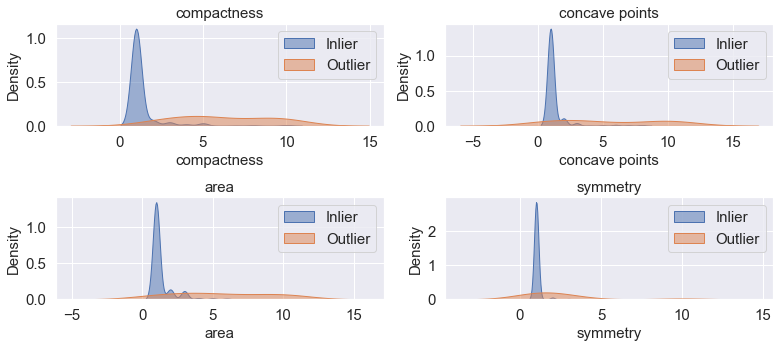

In [6]:
# plot the density estimation of the top ranked features for the inlier and outlier class
fig, axes = plt.subplots(2, 2, figsize=(11, 5))

for ax, c in zip(axes.flatten(), sorted_columns[0:4]):
    sns.kdeplot(data=df[df["label"] == 	b"'no'"], x=c, ax=ax, alpha=.5, fill=True, label="Inlier",  bw_adjust=.9)
    sns.kdeplot(data=df[df["label"] == 	b"'yes'"], x=c, ax=ax, alpha=.5, fill=True, label="Outlier",   bw_adjust=.9)
    ax.legend()
    ax.set_title(c)
fig.tight_layout()
#plt.savefig("images/wine_quality_top_feature_density.svg", bbox_inches="tight")
plt.show()

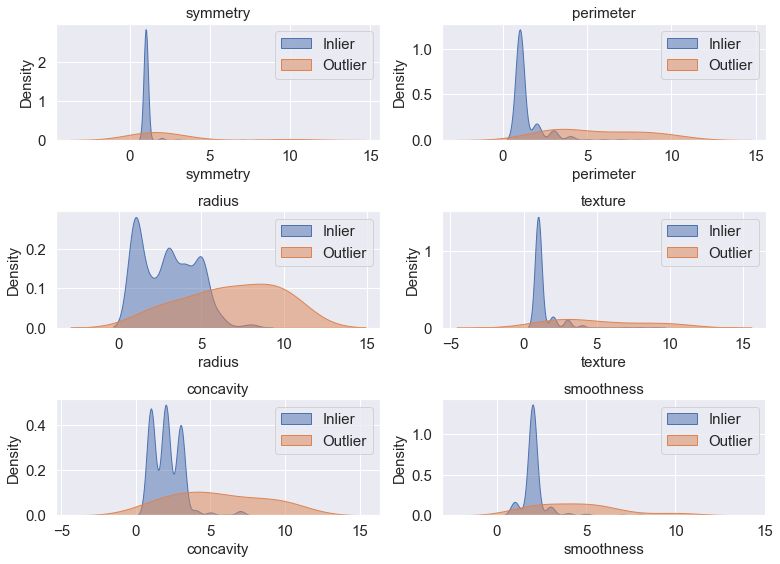

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(11, 8))

for ax, c in zip(axes.flatten(), sorted_columns[-6:]):
    sns.kdeplot(data=df[df["label"] == 	b"'no'"], x=c, ax=ax, alpha=.5, fill=True, label="Inlier",  bw_adjust=.9)
    sns.kdeplot(data=df[df["label"] == 	b"'yes'"], x=c, ax=ax, alpha=.5, fill=True, label="Outlier",   bw_adjust=.9)
    ax.legend()
    ax.set_title(c)
fig.tight_layout()
#plt.savefig("images/wine_quality_top_feature_density.svg", bbox_inches="tight")
plt.show()

In [8]:
#fig, ax = plt.subplots(1, 1, figsize=(13, 10))

#sns.heatmap(df.corr(), ax=ax)

#df.corr()["same_srv_rate"].round(3).sort_values()

dst_host_same_srv_rate, dst_host_srv_serror_rate, serror_rate 

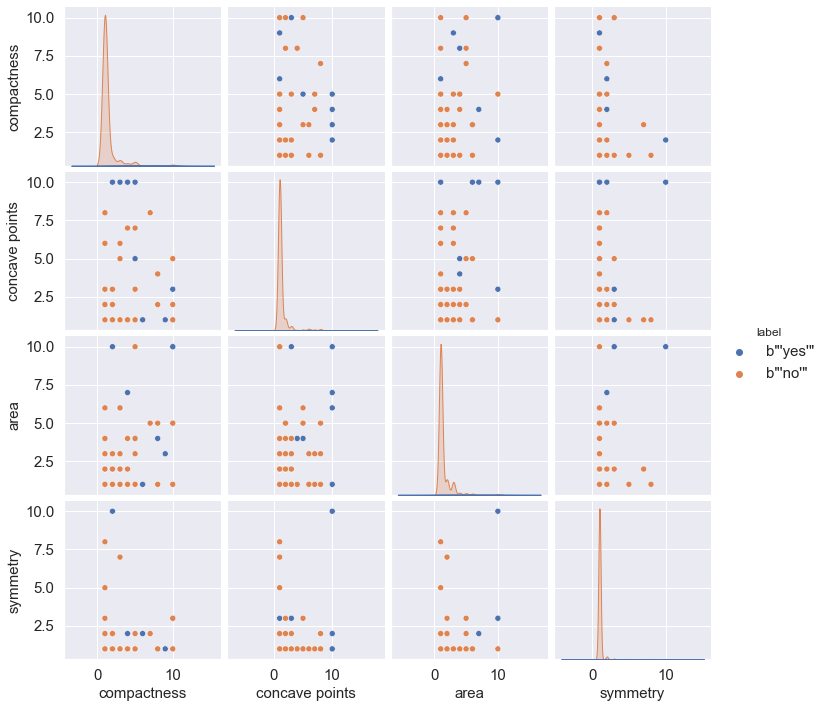

In [9]:
#fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.pairplot(df, hue="label", vars=sorted_columns[0:4])